<a href="https://www.kaggle.com/code/adityapatidar7/salary-prediction?scriptVersionId=152967935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Employee Salary Prediction:

# 1. Business Understanding:

The dataset we are using is "Salary", our main goal is to predict the salary of the employee based on features availble in dataset.

# 2. Data Understanding:

In [1]:
#imoprt important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading, reading data and showing few rows

df = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
#check Number of Rows and Columns:

df.shape

(6704, 6)

so we have 6 columns and 6704 rows

In [4]:
#Name of Columns:

df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Here name of columns is not standard so we will rename it to the standard naming structure

In [5]:
#Rename columns to Standandard Naming

df.columns = ['age', 'gender', 'education_level', 'job_title', 'experience_years',
       'salary']

In [6]:
#Information of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               6702 non-null   float64
 1   gender            6702 non-null   object 
 2   education_level   6701 non-null   object 
 3   job_title         6702 non-null   object 
 4   experience_years  6701 non-null   float64
 5   salary            6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


**By data info we get to know that we have three columns object type and rest 3 is numerical and also we get the idia about missing values in our data **

# 3. Data Cleaning

In [7]:
#Check missing value:

df.isnull().sum()

age                 2
gender              2
education_level     3
job_title           2
experience_years    3
salary              5
dtype: int64

In [8]:
# drop missing values 

df = df.dropna(how='all')
df['education_level'] = df['education_level'].fillna(df['education_level'].mode().iloc[0])
df['experience_years'] = df['experience_years'].fillna(df['experience_years'].mean())
df['salary'] = df['salary'].fillna(df['salary'].median())

In [9]:
#Check Again Missing Values:

df.isnull().sum()

age                 0
gender              0
education_level     0
job_title           0
experience_years    0
salary              0
dtype: int64

Here we dropped rows with all missing values.
filled 'education_level' with mode because of object value.
filled 'experience_years' with mean for a reasonable estimate.
And filled 'salary' with median because of central tedency so outliers will not affect it.

In [10]:
#Check Duplicate Data:

df[df.duplicated()]

,age,gender,education_level,job_title,experience_years,salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [11]:
#Droping Duplicates from Data

emp_data = df.drop_duplicates(keep='first')


In [12]:
emp_data.shape

(1791, 6)

we checked duplicate data and droped duplicated records so now we have 1791 rows and 6 columns.

# 4. Data Exploration and Visualization:

In [13]:
#Summary Statistics of Numerical data:

emp_data.describe()

,age,experience_years,salary
count,1791.000000,1791.000000,1791.000000
mean,35.128420,9.151923,113180.338917
std,8.209562,6.837968,51539.850303
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


by statics we get to know that age is normally distributed and experience_years seems to be normal but it may be right skewed because minimum value is 0, and salary may not be normally distributed because of outliers.
to get better knowlegde lets draw histrogram for visualization.

<Axes: xlabel='age', ylabel='Count'>

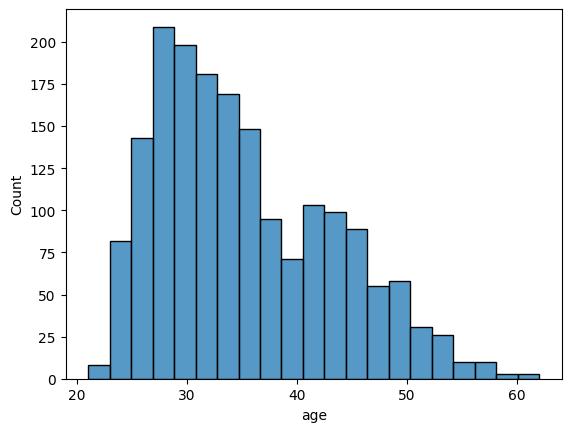

In [14]:
# Create a histogram for 'age'

sns.histplot(data=emp_data, x='age')

<Axes: xlabel='experience_years', ylabel='Count'>

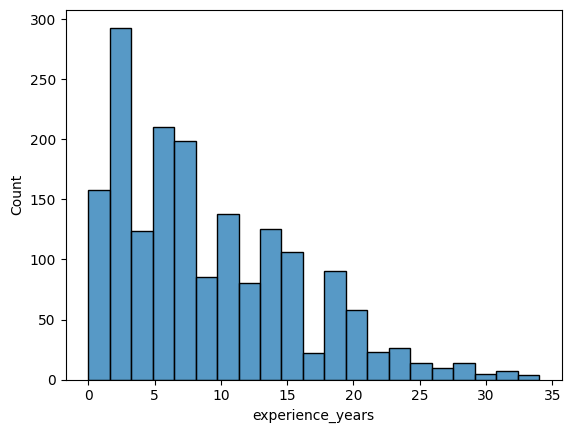

In [15]:
# Create a histogram for 'experience_years'

sns.histplot(data=emp_data, x='experience_years')

<Axes: xlabel='salary', ylabel='Count'>

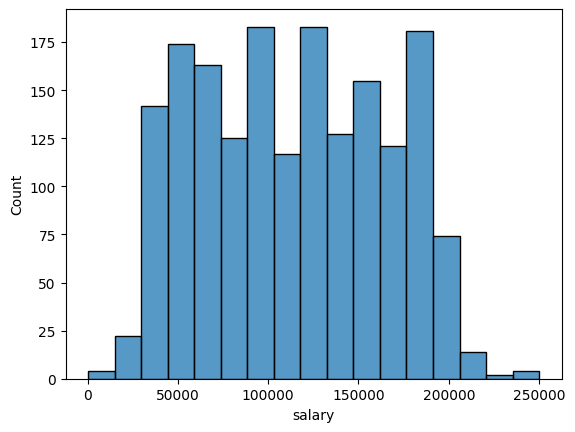

In [16]:
# Create a histogram for 'salary'

sns.histplot(data=emp_data, x='salary')

**Now we need to check the correlation among this variables ******

In [17]:
#correlation of Numeric variables 

emp_data.select_dtypes(include='number').corr()

,age,experience_years,salary
age,1.000000,0.935806,0.766406
experience_years,0.935806,1.000000,0.818655
salary,0.766406,0.818655,1.000000


<Axes: >

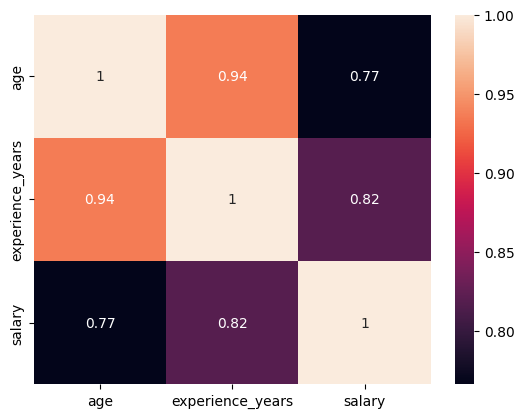

In [18]:
#visualization of corelation:

sns.heatmap(emp_data.select_dtypes(include='number').corr(), annot=True)

correlation matrix show that there is postive linear relation between age , salary and experience_years.
which show higher the age of employee have higher experience and higher experience having higher salary.
Now lets see it on bar graph.

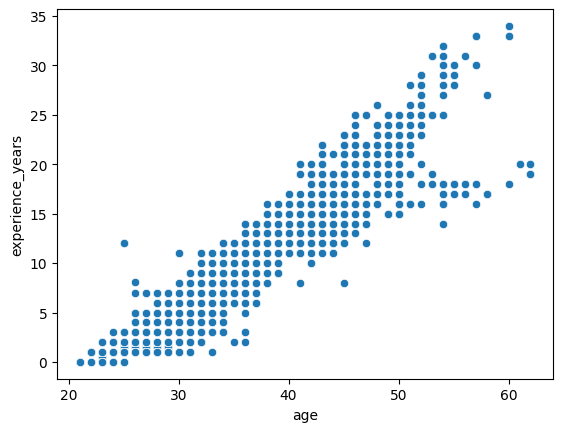

In [19]:
# Create a scatter Graph for 'experience_years' by 'age'


sns.scatterplot(data=df, x='age', y='experience_years')
plt.show()

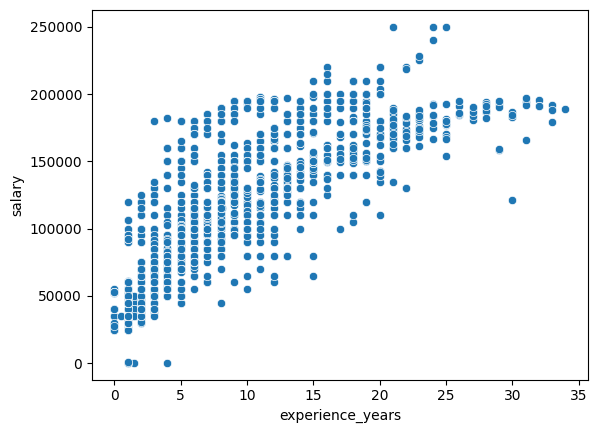

In [20]:
# Create a Bar Graph for 'salary' by 'experience_years'


sns.scatterplot(data=emp_data, x='experience_years', y='salary')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


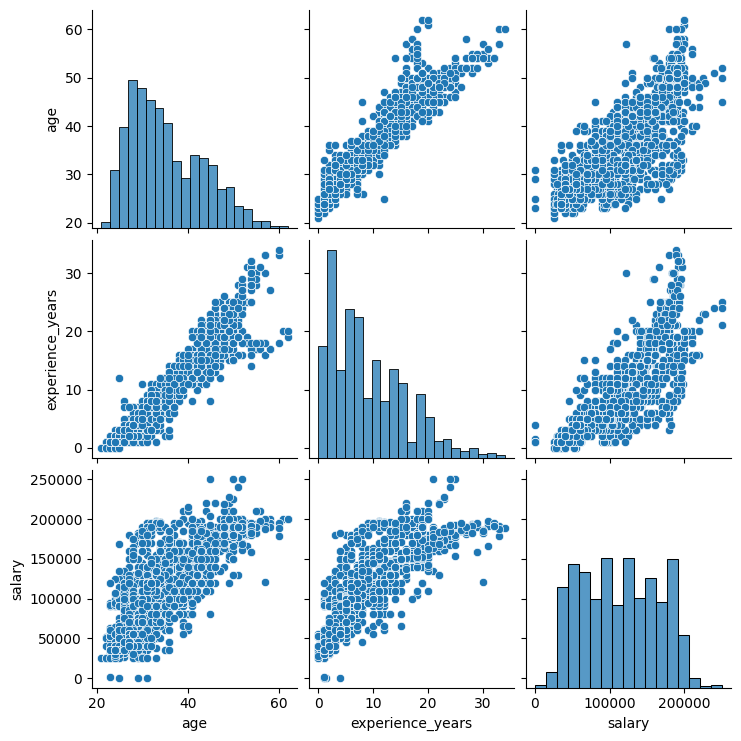

In [21]:
#Create a Pair Plot 

sns.pairplot(data=emp_data)

**Now we will check relation between categorial variable and visualise them on graph for that we will check counts of categories in that particular columns**

In [22]:
#check value counts in  Education Level columns

emp_data['education_level'].value_counts()

education_level
Bachelor's Degree    509
Master's Degree      447
PhD                  340
Bachelor's           262
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Here some values is repeating or similar so we will replace it with correct name.

In [23]:
# replace similar attributs with correct in Education Level columns

emp_data.loc[:,'education_level']=emp_data['education_level'].replace({"phD":"PhD", "Bachelor's": "Bachelor's Degree", "Master's": "Master's Degree"})

In [24]:
#check Again value counts in  Education Level columns

emp_data['education_level'].value_counts()

education_level
Bachelor's Degree    771
Master's Degree      569
PhD                  341
High School          110
Name: count, dtype: int64

<Axes: xlabel='education_level'>

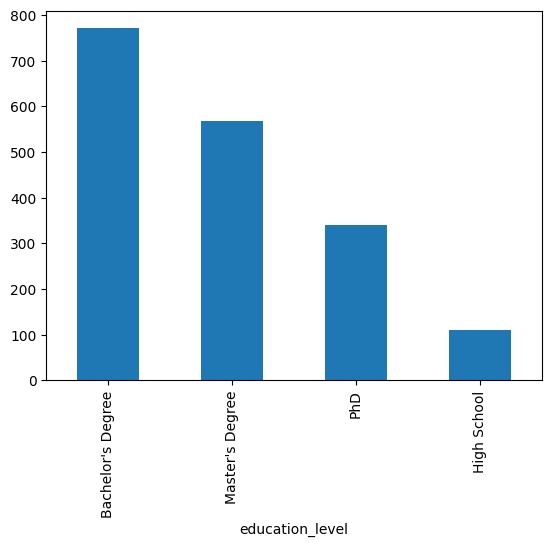

In [25]:
#visualization of education level value counts column:

emp_data['education_level'].value_counts().plot(kind='bar')

In [26]:
#check value counts in  Gender columns

emp_data['gender'].value_counts()

gender
Male      969
Female    815
Other       7
Name: count, dtype: int64

<Axes: xlabel='gender'>

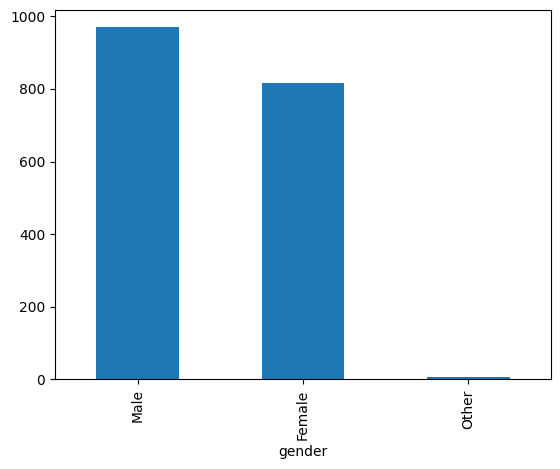

In [27]:
#visualization of gender value counts column:

emp_data['gender'].value_counts().plot(kind='bar')

In [28]:
##check value counts in job_title columns


emp_data['job_title'].value_counts()

job_title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Financial Advisor              1
Junior Designer                1
Chief Technology Officer       1
Technical Recruiter            1
Delivery Driver                1
Name: count, Length: 193, dtype: int64

Here we are not visualising job title column becase it have too many unique value which will quite difficult to represent graphically

# 5. Data Preprocessing:

In [29]:
# dependent variable and independent variable 

x = emp_data.drop(['salary'], axis=1)
y = emp_data['salary']

In [30]:
#Split Data into Train and Test Set:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [31]:
#Create Pipline For Scalling, OneHotEncoding, and model

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



num_preprocessor = Pipeline([('scaler', StandardScaler())])

cat_preprocessor = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('numerical',num_preprocessor, ['age', 'experience_years']),
    ('categorical',cat_preprocessor, ['gender', 'education_level', 'job_title'])])

linear_regression_pipeline = Pipeline([('preprocessor',preprocessor), ('linear_regression',LinearRegression())])

random_forest_pipeline = Pipeline([('preprocessor',preprocessor), ('random_forest',RandomForestRegressor())])



We have 6 columns in which 3 numerical and 3 categorical so with the help of our library we scaled the numeric column and converted the categorical column into numeric using onehotcode library.  Then with the help of columntransformer library, columns of both types combined with a variable named preprocessor and then create pipeline for 2 diffrent models(Linear regression and Random Forest regression).

# 6. CROSS VALIDATION AND MODEL SELECTION

In [32]:
# cross validation scores using k-fold cross validation for both model pipeline 

from sklearn.model_selection import cross_val_score

linear_cross_val_scores = cross_val_score(linear_regression_pipeline, x_train, y_train, cv=5)
print(f"linear cross valisdation scores are:{linear_cross_val_scores}")

random_cross_val_scores = cross_val_score(random_forest_pipeline, x_train, y_train, cv=5)
print(f"random forest cross valisdation scores are:{random_cross_val_scores}")


if linear_cross_val_scores.mean() > random_cross_val_scores.mean():
    selected_model = linear_regression_pipeline
    print("Linear Regression is selected.")
else:
    selected_model = random_forest_pipeline
    print("Random Forest Regression is selected.")
    
# fit the selected model to train data
selected_model.fit(x_train, y_train)

linear cross valisdation scores are:[0.82706753 0.83872798 0.82005383 0.83423233 0.8521689 ]
random forest cross valisdation scores are:[0.89346785 0.91500914 0.8668064  0.90269325 0.85821623]
Random Forest Regression is selected.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'experience_years']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'education_level',
                                                   'job_title'])])),
                ('random_forest', RandomForestRegressor())])

Now we have 2 pipelines for 2 different models, we checked the cross validation score of both the models then we select the random Forest regression model because it is having high cross validation score. 

Then fitted the Random Forest Pipeline into training data


# 7. Model Evalution

In [33]:

#Predict salary in training Data and calculate accuracy

from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = selected_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)
rmse_train = np.sqrt(mse_train)
print(f"root mean square of training data: {rmse_train}")
print(f"R square of training data: {r2_train}")

root mean square of training data: 7006.560813111515
R square of training data: 0.9814740733018674


 We checked r2 and rmse using python matris library for training data which helps us to know the accuracy of the model which is 98 % for traing data

In [34]:
#Predict salary in Test Data and calculate accuracy

y_test_predict = selected_model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)
rmse_test = np.sqrt(mse_test)

print(f"root mean square of testing data: {rmse_test}")
print(f"R square of testing data: {r2_test}")

root mean square of testing data: 15859.707831789146
R square of testing data: 0.9059391544180063


 then checked r2 and rmse for test data which helps us to know the accuracy of the model which is 91 % for TEST data